# Notebook to analyse the cluster results

In [1]:
import numpy as np
import faiss
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_k(df, title) -> None:
    """Plots out the performance of the different clustering methods in search"""
    for method in df.columns[1:]:
        plt.plot(df["K"], df[method], marker='o', label=method)

    plt.title(title)
    plt.xlabel("k")
    plt.ylabel("Accurcay")
    plt.legend(loc="lower left", fontsize='small')
    plt.grid(True)
    plt.show()

In [3]:
df_it_medium = {
    "K": [1, 3, 5, 8, 10, 25],
    "BIRCH": [85.052, 76.732, 72.969, 69.780, 68.434, 62.626],
    "Mini Batch K-means": [83.386, 76.172, 72.929, 70.117, 68.849, 63.808],
    "Randomly 40% removed": [80.998, 75.506, 72.959, 70.73, 69.748, 65.847],
}

df_it_large = {
    "K": [1, 3, 5, 8, 10, 25],
    "Mini Batch K-means": [79.866, 73.59, 70.714, 68.096, 66.852, 61.646],
    "HDBSCAN": [64.096, 53.088, 49.109, 46.031, 44.808, 40.681],
}

df_it_medium = pd.DataFrame(df_it_medium)
df_it_large = pd.DataFrame(df_it_large)

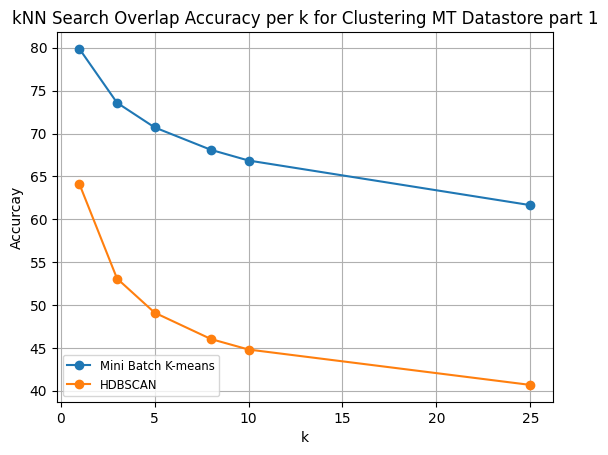

In [4]:
plot_k(df_it_large, "kNN Search Overlap Accuracy per k for Clustering MT Datastore part 1")

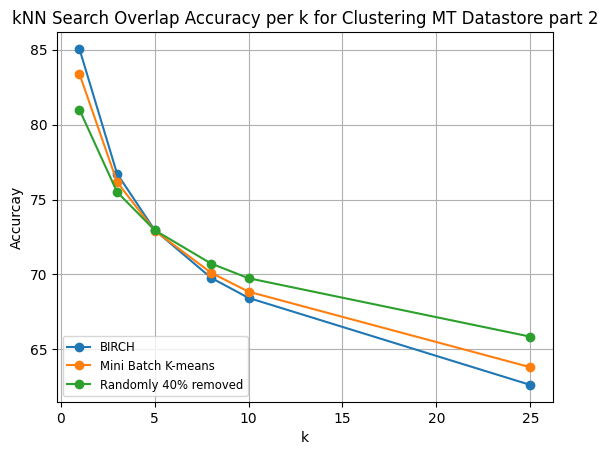

In [5]:
plot_k(df_it_medium, "kNN Search Overlap Accuracy per k for Clustering MT Datastore part 2")

In [16]:
data_commonvoice_large =  {
    "K": [1, 3, 5, 8, 10, 25],
    "BIRCH": [98.19, 94.923, 92.738, 90.361, 89.045, 82.587],
    "Mini Batch K-means": [98.024, 96.698, 95.627, 94.172, 93.3244, 88.650],
    "Agglomerative Clustering": [98.232, 96.740, 95.534, 93.955, 93.091, 88.342],
    "DBscan": [94.742, 88.707, 85.917, 82.862, 81.347, 74.201]
}

data_perid_vs_complete = {
    "K": [1, 3, 5, 8, 10, 25],
    "Mini Batch K-means per ID": [98.024, 96.698, 95.627, 94.172, 93.3244, 88.650],
    "Mini Batch K-means complete dataset": [96.61, 95.287, 94.370, 93.13, 92.426, 88.138]
}

data_complete_cluster = {
    "K": [1, 3, 5, 8, 10, 25],
    "HDBSCAN": [97.392, 94.275, 92.551, 90.534, 89.448, 83.773],
    "MinibatchKmeans": [96.61, 95.287, 94.370, 93.13, 92.426, 88.138],
    "Kmeans": [97.148, 95.771, 94.801, 93.599, 92.891, 88.784],
    "Rank based pruning": [96.592, 96.23, 95.852, 94.958, 94.358, 90.566],
    "Randomly removing": [96.948, 95.732, 94.831, 93.705, 93.046, 89.074]
}

data_best_performing = {
    "K": [1, 3, 5, 8, 10, 25],
    "Mini Batch K-means per ID": [98.024, 96.698, 95.627, 94.172, 93.3244, 88.650],
    "Rank based pruning": [96.592, 96.23, 95.852, 94.958, 94.358, 90.566],
    "Randomly removing": [96.948, 95.732, 94.831, 93.705, 93.046, 89.074],
    "Agglomerative Clustering": [98.232, 96.740, 95.534, 93.955, 93.091, 88.342]

}
medium_keys = ["Kmeans Faiss (n_clusters = size / 2) complete dataset", "Filter Compression 40%",  "60% randomly removed", "HDBSCAN complete dataset"]

df_commonvoice_large = pd.DataFrame(data_commonvoice_large)
df_perid_vs_complete = pd.DataFrame(data_perid_vs_complete)
df_complete_data = pd.DataFrame(data_complete_cluster)
df_best_performing = pd.DataFrame(data_best_performing)

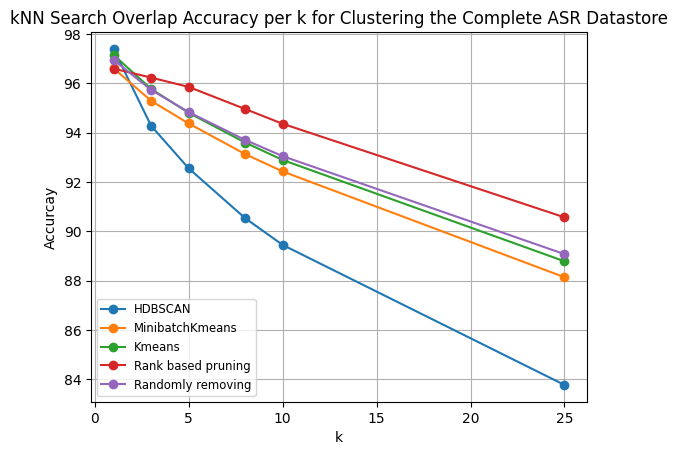

In [17]:
plot_k(df_complete_data, "kNN Search Overlap Accuracy per k for Clustering the Complete ASR Datastore")

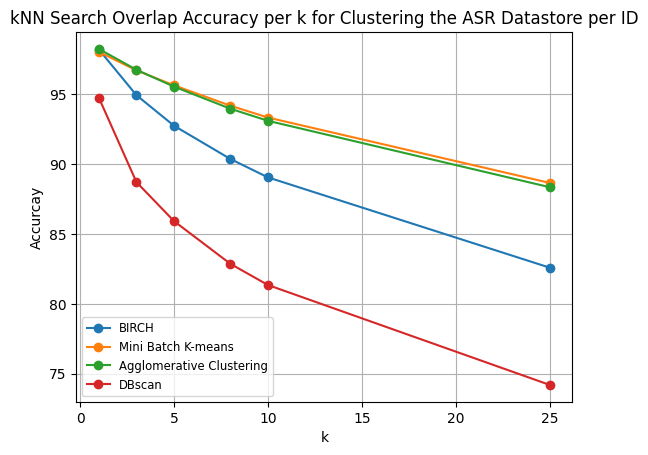

In [19]:
plot_k(df_commonvoice_large, "kNN Search Overlap Accuracy per k for Clustering the ASR Datastore per ID")

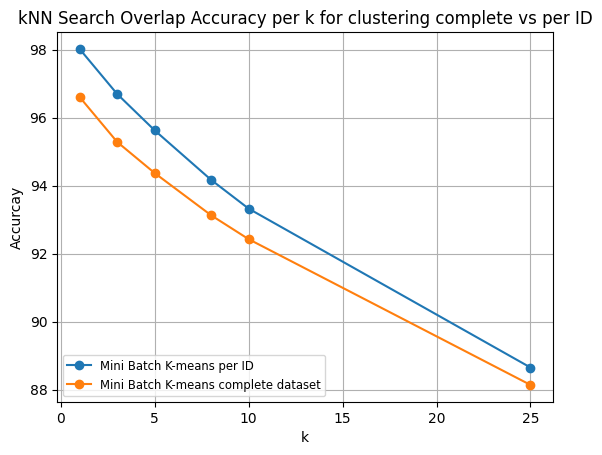

In [20]:
plot_k(df_perid_vs_complete, "kNN Search Overlap Accuracy per k for clustering complete vs per ID")

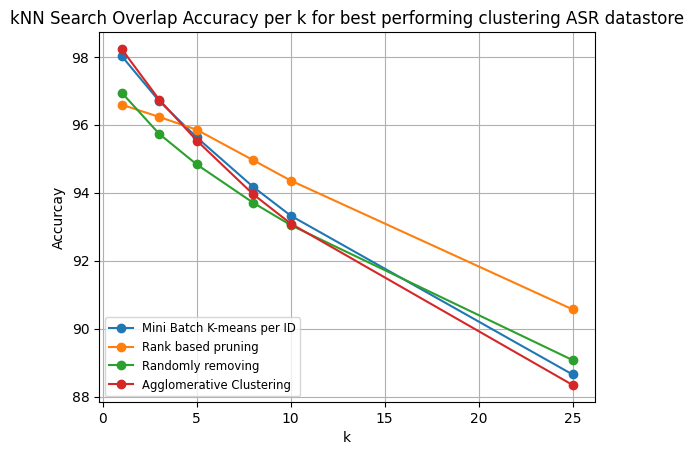

In [15]:
plot_k(df_best_performing, "kNN Search Overlap Accuracy per k for best performing clustering ASR datastore")

### Plotting out the different datastore

In [ ]:
import umap
import matplotlib.pyplot as plt
import faiss

Load data (for other datastores this can look different)

In [ ]:
index = faiss.read_index("it.deen.faiss_L2_IVFPQindex_cs64_nprobe32")

In [ ]:
keys = np.memmap("it_train.features.npy", dtype=np.float32, mode='r', shape=(index.ntotal, index.d))
ids = np.memmap("it_train.targets.npy", dtype=np.int32, mode='r', shape=(index.ntotal,))

In [ ]:
umap_vis = umap.UMAP(n_neighbors = 15, min_dist = 0.1, n_components = 2, random_state = 42)
umap_vis = umap_vis.fit(keys[:50_000])
X_vis = umap_vis.transform(keys)

In [ ]:
plt.figure(figsize=(8, 6))
hexbin = plt.hexbin(X_vis[:, 0], X_vis[:, 1], gridsize=100, cmap='viridis', mincnt=1)
plt.title("Visualization of commonvoice Datastore (UMAP 2D)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(hexbin, label='Counts')
plt.show()